# 02 - Generate a frequency response curve

After running the previous notebook, [01 - Performing a test](01%20-%20Performing%20a%20test.ipynb), we now have two audio files. One is a baseline signal that we got from running a sweep test without the DUT connected to the audio interface. The other is the signal we obtained from the DUT. We want to compare the two signals to find out the frequency response of the DUT. `freqbench` has a simple interface for this. We're also going to use `matplotlib` to create a plot.

In [1]:
# imports
import freqbench
import matplotlib.pyplot as plt
import matplotlib

Let's load up the data we generated with the last notebook.

In [2]:
base_signal, fr0 = freqbench.load('test_data/base_signal.wav')
dut_signal, fr1 = freqbench.load('test_data/dut_signal.wav')
assert fr0 == fr1
frame_rate = fr0

We can calculate the frequency response between the two signals with `freqbench.analysis.freqresp()`. This returns two 1-D arrays of equal size. One contains a range of frequencies, in Hz, and the other tells us the response of the DUT at the corresponding frequency. Response is measured in decibels between the amplitudes of the two signals.

In [3]:
freqs, response = freqbench.analysis.freqresp(
    base_signal, dut_signal, frame_rate)

Finally, let's plot the frequency response.

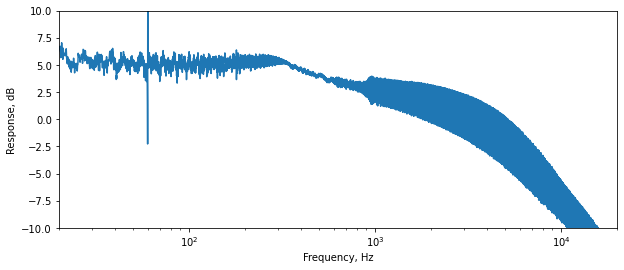

In [4]:
plt.figure(figsize=(10, 4))
plt.xscale('log')
plt.xlim([20, 20_000])
plt.ylim([-10, 10])
plt.ylabel('Response, dB')
plt.xlabel('Frequency, Hz')
plt.plot(freqs, response)
plt.show()

And there's the frequency response! There will be some noise in the plot, because of the fact that we're using discrete sampled signals of finite length. We can smooth that out a bit with `freqbench.analysis.smooth()`.

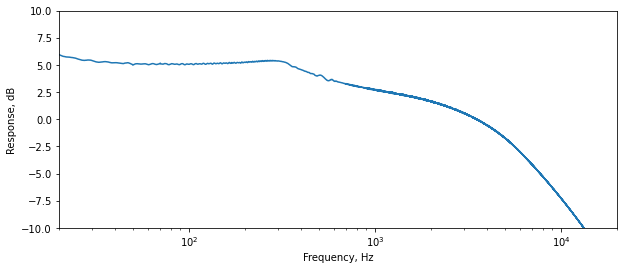

In [5]:
response_smooth = freqbench.analysis.smooth(response, 100)

plt.figure(figsize=(10, 4))
plt.xscale('log')
plt.xlim([20, 20_000])
plt.ylim([-10, 10])
plt.ylabel('Response, dB')
plt.xlabel('Frequency, Hz')
plt.plot(freqs, response_smooth)
plt.show()